In [1]:
import json

# Open the JSON file
with open('data\\vimmsd-public-test.json', 'r') as file:
    # Load the JSON data
    data = json.load(file)


In [2]:
import unicodedata

def has_emoji(text):
    emos = []
    for char in text:
        # Check if the character is an emoji
        if unicodedata.category(char).startswith('So'):
            emos += char 
    return len(emos) > 0, set(emos)


In [3]:
text1 = """THỜI ĐẠI TIU-ĐÂY lên ngôi❗️ Chim chuột với chồng bạn ngay sau lưng!
Truy tìm chị vợ áo hoa trong video và muốn nói cho chị rằng:” Chị ơi bạn chị cả chồng chị nắm tay nhau sau lưng chị kìa❗️❗️
Chị chị em em cây cà lem cũng muốn g/i/ậ/t!"""

text2 = "Cô ấy trên mạng vs cô ấy ngoài đời =)))"
text3 = "Để kao giữ xe hắn lại cho,mài đi báo cảnh sát đi 😆😄."

print(has_emoji(text1))  # Output: True
print(has_emoji(text2))  # Output: False
print(has_emoji(text3))  # Output: False


(True, {'❗'})
(False, set())
(True, {'😆', '😄'})


In [4]:
data["0"]

{'image': 'bb934d7d7f7652903c24272d405e4b31c70689cec93f86d5d36f17707c36fceb.jpg',
 'caption': 'Hãy thực tế lên, đừng kêu ca nữa :)))',
 'label': None}

In [6]:
icon_idx = []
label_map = {
    None: 0,
}
count_label_emoji = {
    None: 0,
}
map_icon = {
    None: {},
}
for i in range(len(data)):
    check, emos = has_emoji(data[str(i)]['caption'])
    label = data[str(i)]['label']
    if check:
        count_label_emoji[label] += 1
        for emo in emos:
            map_icon[label][emo] = map_icon[label].get(emo, 0) + 1

In [9]:
# export to json file, make the json exported file can store emoji
with open('icon_test.json', 'w', encoding='utf-8') as f:
    json.dump(map_icon, f, ensure_ascii=False, indent=4)

<BarContainer object of 109 artists>

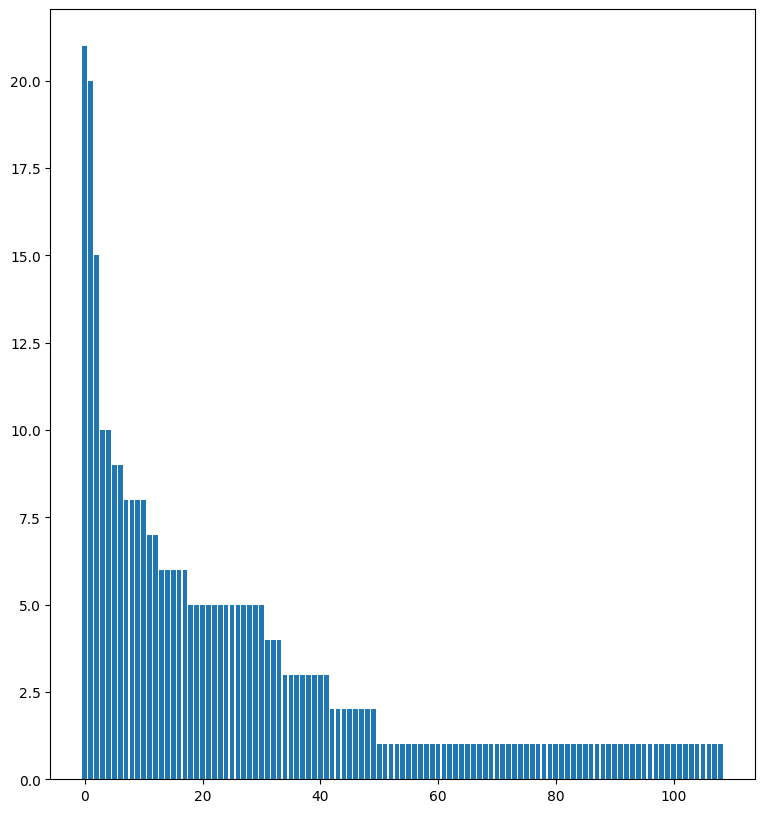

In [10]:
# plot the values 
import matplotlib.pyplot as plt
import numpy as np
# subplot for not and multi sarcasm 
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
b = sorted(map_icon[None].values(),reverse=True)
plt.bar(range(len(b)), b)

Choose 25 as threshold for not sarcasm and 10 for multi-sarcasm

In [7]:
emoji_not_sarcasm = []
for k,v in map_icon["not-sarcasm"].items():
    if v >= 25:
        emoji_not_sarcasm.append(k)
        
emoji_multi_sarcasm = []
for k,v in map_icon["multi-sarcasm"].items():
    if v >= 10:
        emoji_multi_sarcasm.append(k)

In [13]:
emoji_list = map_icon[None].keys()
len(emoji_list)

109

In [69]:
train_emoji_list = []
with open('emoji_list_no_repeat_larger.txt', 'r', encoding='utf-8') as f:
    train_emoji_list = f.readlines() 
    train_emoji_list = [x.strip() for x in train_emoji_list]

In [70]:
print(len(train_emoji_list))

45


In [71]:
# count the number of emoji appearing in both train and test
count = 0
for emo in emoji_list:
    if emo in train_emoji_list:
        count += 1
count

35

In [72]:
emoji_list

dict_keys(['🤔', '😮', '🤩', '✨', '🔥', '🇺', '🇸', '🇨', '🇳', '✅', '🇰', '🇷', '🇻', '😅', '🤣', '😎', '🤟', '😂', '❤', '😛', '🐧', '💀', '👌', '🎶', '😢', '👇', '👉', '😭', '😞', '🥲', '🤫', '👍', '🤌', '🤍', '🛑', '🙏', '🥰', '🥳', '😍', '🥵', '🤭', '😣', '👑', '📍', '⚡', '💐', '💦', '🔜', '🌼', '🥹', '🎉', '☝', '🥱', '🗿', '🫣', '🫶', '😔', '😐', '☠', '👦', '😳', '🫡', '🚨', '🫰', '♂', '🦸', '🤗', '😿', '😒', '😏', '👏', '😌', '💖', '🦄', '😠', '🥺', '🌝', '😟', '😘', '🙁', '🐼', '📽', '🐸', '🙈', '📸', '🌟', '🦍', '🎥', '💥', '🎟', '🐉', '👶', '🎬', '🤕', '🙇', '😤', '🧑', '🦽', '🟥', '💯', '☹', '⭐', '🤡', '🏴', '🥴', '🙂', '❗', '🤨', '🫢'])

In [73]:
count = {}
for id,d in data.items():
    label = d["label"]
    if label not in count:
        count[label] = 0
    count[label] += 1
    
count_label_emoji, count

({None: 245}, {None: 1413})

In [75]:
map_count_emo = {}
for emo in train_emoji_list:
    map_count_emo[emo] = 0

for i in data.keys():
    check, emos = has_emoji(data[str(i)]['caption'])
    if check:
        for emo in emos:
            if(emo in train_emoji_list):
                map_count_emo[emo] += 1

In [76]:
# save to a pandas dataframe
import pandas as pd

# 3 cols, the first is emoji, the second is the number of emoji in not sarcasm, the third is the number of emoji in sarcasm

df = pd.DataFrame(columns=["emoji", "count"])
df["emoji"] = train_emoji_list
df["count"] = [map_count_emo[emo] for emo in train_emoji_list]
# for emo in emoji_list:
    # df = df.append({"emoji": emo, "not-sarcasm": map_not_sarcasm[emo], "sarcasm": map_sarcasm[emo]}, ignore_index=True)

In [58]:
df

,emoji,count
0,🥹,4
1,😇,0
2,❤,15
3,♥,0
4,😢,9
5,😂,3
6,😎,7
7,🥰,8
8,🔥,21
9,🙁,2


In [61]:
import unicodedata

# char = '❤'
# name = unicodedata.name(char)
# print(name)
for icon in train_emoji_list:
    print(icon, unicodedata.name(icon))

🥹 FACE HOLDING BACK TEARS
😇 SMILING FACE WITH HALO
❤ HEAVY BLACK HEART
♥ BLACK HEART SUIT
😢 CRYING FACE
😂 FACE WITH TEARS OF JOY
😎 SMILING FACE WITH SUNGLASSES
🥰 SMILING FACE WITH SMILING EYES AND THREE HEARTS
🔥 FIRE
🙁 SLIGHTLY FROWNING FACE
👇 WHITE DOWN POINTING BACKHAND INDEX
🚨 POLICE CARS REVOLVING LIGHT
😃 SMILING FACE WITH OPEN MOUTH
✨ SPARKLES
🙂 SLIGHTLY SMILING FACE
🐧 PENGUIN
😍 SMILING FACE WITH HEART-SHAPED EYES
👉 WHITE RIGHT POINTING BACKHAND INDEX
💀 SKULL
🇳 REGIONAL INDICATOR SYMBOL LETTER N
🤡 CLOWN FACE
🙏 PERSON WITH FOLDED HANDS
☺ WHITE SMILING FACE
🇻 REGIONAL INDICATOR SYMBOL LETTER V
🤣 ROLLING ON THE FLOOR LAUGHING
😅 SMILING FACE WITH OPEN MOUTH AND COLD SWEAT
😏 SMIRKING FACE
👍 THUMBS UP SIGN
😆 SMILING FACE WITH OPEN MOUTH AND TIGHTLY-CLOSED EYES
😀 GRINNING FACE
🥲 SMILING FACE WITH TEAR


In [62]:
# hash tag
# return the whole hash tags
def has_hash_tag(text):
    split_text = text.split()
    res = []
    for t in split_text:
        if t[0] == "#":
           res.append(t) 
    return len(res)>0, res
# count how many hash tag in each label

count_label_hash_tag = {
    None: 0,
}
map_hash_tag = {
    None: [],
}
map_hash_tag_len={
    None: [],
}
for i in data.keys():
    check, hash_tags = has_hash_tag(data[str(i)]['caption'])
    label = data[str(i)]['label']
    map_hash_tag[label]+=(hash_tags)
    map_hash_tag_len[label].append(len(hash_tags))
    if check:
        count_label_hash_tag[label] += 1

count_label_hash_tag

{None: 301}

In [63]:
# write the function to count frequency of number in a list python 
def count_freq(arr):
    freq = {}
    for item in arr:
        if item not in freq:
            freq[item] = 0
        freq[item] += 1
    # return sorted map
    return freq


In [65]:
# count the number of each len_hashtag
print("None", count_freq(map_hash_tag_len[None]))

None {0: 1112, 2: 27, 5: 15, 3: 38, 1: 209, 4: 8, 8: 2, 6: 1, 7: 1}


In [66]:
# hidden icon

def has_hidden_icon(text):
    # hidden icon is the icon that is not in the unicode, but usually start with ":" and follow by a character
    # for example: :v, :), :(, :))) 
    split_text = text.split()
    res = []
    for t in split_text:
        if t[0] == ":" and len(t) > 1:
            res.append(t)
    return len(res)>0, res

count_label_hidden_icon = {
    None: 0,
}
map_hidden_icon = {
    None: [],
}
map_hidden_icon_len={
    None: [],
}
for i in data.keys():
    check, hidden_icons = has_hidden_icon(data[str(i)]['caption'])
    label = data[str(i)]['label']
    map_hidden_icon[label]+=(hidden_icons)
    map_hidden_icon_len[label].append(len(hidden_icons))
    if check:
        count_label_hidden_icon[label] += 1


In [67]:
count_label_hidden_icon

{None: 225}

In [68]:
# count the number of each len_hashtag
print("None", count_freq(map_hidden_icon[None]))

None {':)))': 113, ':v': 15, ':))': 10, ':))))': 59, ':(((': 14, ':(((((((((': 1, ':(((((': 2, ':******': 1, ':&lt;': 1, ':adore:': 1, ':ngaonghevn:': 1, ':((((': 4, ":')": 1, ':)))(': 3, ':((': 1}
